## 在线性回归模型中使用梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. 自己模拟数据

In [7]:
np.random.seed(666) # 为了数据的可重复性，使用随机种子
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100) 

上一步设置成x，是为了可视化方便

我们还是使用X表示，为了更好的拓展到多维。

In [8]:
X = x.reshape(-1, 1) #100行1列 

In [9]:
X.shape

(100, 1)

In [10]:
y.shape

(100,)

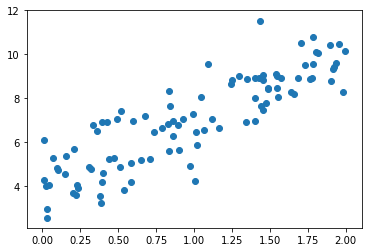

In [11]:
plt.scatter(x, y)

### 使用梯度下降法训练

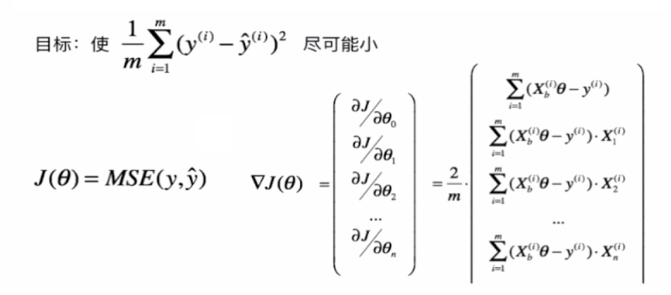

### 封装函数

In [19]:
# 损失函数
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf') # 防止过大溢出
# 对J求导
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = np.sum((X_b.dot(theta) - y).dot(X_b[:, i])) #X_b[:, i]:取出该样本的第几个特征
    return res * 2 / len(X_b)

### 上一篇博客中的梯度下降法

In [20]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        i_iter += 1
    return theta

In [22]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1]) # 现在的初始 theta 是一个向量,该向量中元素的数量为特征数+1 
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [23]:
theta #[截距，斜率]

array([4.02145786, 3.00706277])

### 测试封装的线性回归算法

In [41]:
%run D:\\python-code\LinearRegression.py

In [42]:
lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [43]:
lin_reg.coef_

array([3.00706277])

In [44]:
lin_reg.interception_

4.021457858204859